## 第4章: 形態素解析  

夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，  
その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．  

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．  



### 30. 形態素解析結果の読み込み  
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．  
ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し,  
1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [1]:
import MeCab
tagger = MeCab.Tagger("")
tagger.parse(" ")

f = open("neko.txt","r")
datas = f.read()
f.close()
datas = datas.split("\n")

In [2]:
#表層形\t品詞,品詞細分類1,品詞細分類2,品詞細分類3,活用型,活用形,原形,読み,発音
docs = []
for data in datas:
    doc =[]
    node = tagger.parseToNode(data)
    while node:
        word = node.surface
        feature = node.feature.split(",")
        if feature[0] != "BOS/EOS":
            morph = {}
            morph["base"] = feature[6]
            morph["surface"] = word
            morph["pos"] = feature[0]
            morph["pos1"]= feature[1]
            doc.append(morph)
        node = node.next
    docs.append(doc)
    
    

### 31. 動詞  
動詞の表層形をすべて抽出せよ．

In [3]:
verbs = set()
for doc in docs:
    for morph in doc:
        if morph["pos"] == "動詞":
            verbs.add(morph["surface"])

print(len(verbs),verbs)
            
            

3893 {'充たさ', '伝える', '見張っ', 'ねぶっ', '担ぐ', '来よ', 'ぶらつい', '抱え込ん', '起さ', '及ば', 'つまり', '取払う', '茂っ', '太れる', 'かぎっ', '舐め', '上げ', '舞い戻っ', '睨ま', '棄てる', '思いやら', '押す', 'ござい', '寄こし', '吸っ', '奮っ', '濡れ', '造っ', '受け合わ', '吹きかける', '作り上げ', '信じ', 'とろ', '留める', '動け', '話せ', '分り', 'くっ', 'ざれ', '終え', 'たつ', '売り飛ばし', 'わかれ', '暮れれ', '進ん', '係わり', '苦しめん', '割り切れる', '吹きかけ', '言い放っ', '見せびらかし', 'やって来る', '込む', 'え', '騒ぎ出す', '抜く', '拵え', '痛め', '打ち立て', 'きら', '食え', 'つい', '思い及ば', 'た', '挿し', '転がり', '使い', 'わり', '曝し', '演ずる', '越え', '見かね', '褒め', '向う', '掻きむしる', '指し', 'つかまえ', '息ん', '掘っ', '描き出し', '凌い', '可愛がっ', '在り', '進む', '繋い', '買お', 'しくじっ', '習っ', '調べ', 'ち', '困り', '洗う', '勝た', 'しだす', 'すまし', '見て取る', '気が付く', 'まかり', '懸ける', 'やり', 'あらわす', '責め', '論じ', '片づい', '伺お', '保と', 'せる', '祭り', '擲つ', '揉ま', 'いらっしゃる', '滑れ', '動く', '磨き', '消し', '行きゃ', '失わ', '値する', '仰向き', '途切れる', '得ろ', '止す', 'のぼせる', '食べる', '思う', '憤る', 'かざら', '埋っ', '行っ', 'つづき', '吐く', '捨て', '怒っ', '抓み', '入り乱れ', '撲', '御する', '計り', 'なぐる', '溯っ', 'あいかわら', '戦っ', 'はいら', '還す', '触れ', '見合せ', '命じ', 'すれ', '捕まっ', 

### 32. 動詞の原形  
動詞の原形をすべて抽出せよ．

In [4]:
verbs_origin = set()
for doc in docs:
    for morph in doc:
        if morph["pos"] == "動詞":
            verbs_origin.add(morph["base"])

print(len(verbs_origin),verbs_origin)

2300 {'乗じる', '費やす', 'ふくらす', '伝える', '担ぐ', '見離す', '取払う', '枉げる', '太れる', 'なぐさむ', '確かめる', '棄てる', '放る', '押す', '吹きかける', '留める', '待ち合せる', 'ぼる', 'たつ', '除ける', '聞き惚れる', '割り切れる', '屠る', '込む', 'やって来る', '騒ぎ出す', '抜く', 'ぶらさげる', '緩める', '居る', 'とりのける', '跳ねる', 'じゃらす', '撰ぶ', '戒める', '詣る', '演ずる', '怒鳴りつける', '向う', '比する', '掻きむしる', '臭う', '立ち寄る', '進む', 'むき出す', '転がす', '絞め殺す', '洗う', 'かじる', '畳み込む', 'いいかねる', 'しだす', '待ち構える', '見て取る', '気が付く', '懸ける', 'あらわす', '演じる', 'せる', '擲つ', 'いらっしゃる', '動く', '涼む', '寝ぼける', 'ちょろまかす', '漕ぐ', 'いそぐ', '値する', '途切れる', '止す', 'のぼせる', '食べる', '差す', '引っ掻く', '思う', '凝り固まる', '憤る', '投げ出す', 'ゆう', '仕入れる', '吐く', '混ぜる', '御する', '点じる', 'なぐる', 'もたす', '奉じる', '見逃す', '買い込む', '還す', 'すまう', '植え付ける', '置ける', '散る', '容れる', '坐る', 'あるく', '振り立てる', '和する', 'つまる', '催す', '係る', 'いたす', 'つまみ出す', '蓄える', '煮る', '腐れる', '飛び込める', '慕う', '余る', '釣り合う', '利く', '恐る', '縮む', 'たたく', '心得る', '歴る', 'かざる', '引き起す', 'はる', '数え切れる', 'こせつく', '流れ込む', '通り掛る', '担う', '見張る', '壊れる', 'せしめる', '切り上げる', '代える', '埋る', '吸い出す', '控える', '洗える', '聞き返す', '望む', 'おくれる', '開き直る'

### 33. サ変名詞  
サ変接続の名詞をすべて抽出せよ  

In [5]:
nouns_sahen = set()
for doc in docs:
    for morph in doc:
        if morph["pos"] == "名詞" and morph["pos1"] == "サ変接続":
            nouns_sahen.add(morph["surface"])

print(len(nouns_sahen),nouns_sahen)

1280 {'一段落', '怒号', '雑談', '弁難', '伝習', '掠奪', '病気', '消費', '皆済', '検査', '慰撫', '胚胎', '寸断', '反抗', '平行', '畏怖', '暗誦', '精進', '防禦', '=', '恐悦', '尋問', '完成', '演繹', '心配', '勉強', '生活', '弄', '工夫', '出ろ', '黙過', '打算', '乾燥', '連戦', '議論', '沈黙', '療治', '紹介', '当番', '通知', '脱稿', '長生き', '同情', '苦悶', '中絶', '下宿', '罵倒', 'ていかん', '集中', '運転', '右往左往', '下痢', '代理', '苦心', '蔵', '遭遇', '呈', '成立', '思案', '保存', '参堂', '展覧', '挺', '胡坐', '帰依', '蠢動', '弁護', '応用', '征伐', '見当', '一周', '返礼', '横行', '離合', 'ろか', '暴露', '蓄積', '肉食', '軽蔑', '持', '返答', '平均', '奮闘', '進呈', '食事', '増加', '案内', '行水', '専有', '克復', '成仏', '志望', '溷濁', '網羅', '脱化', '憫笑', '探検', '欠勤', '情死', '退却', '動揺', '熟睡', '喚起', '委任', '演奏', '買収', '失敬', '抵抗', '専攻', '説法', '倦怠', '退治', '相対', '組織', '貯金', '分', '日帰り', '満足', '思索', '滅却', '粘着', '諷刺', '成就', '酷評', '交叉', '入会', '白黒', '了見', '塗抹', '感染', '逡巡', '否定', '座禅', '負傷', '変形', '貯蓄', '看過', '志願', '恐縮', '煩悶', '消光', '諒察', '許諾', '了解', '萎縮', '夭折', '同室', '承知', '作用', '廃絶', '養成', '解決', '慣用', '糾合', '自乗', '進歩', '啓', '創作', '増長', '発揮', '試験', '刻', '嘲笑', '伝染', '拱手', 'いたずら'

### 34. 「AのB」  
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [18]:
noun_phrase = set()
for doc in docs:
    for i in range(len(doc)-2):
        term1,term2,term3 = doc[i],doc[i+1],doc[i+2]
        if term1["pos"] == "名詞" and term2["surface"] == "の" and term3["pos"] == "名詞":
            noun_phrase.add(term1["surface"]+term2["surface"]+term3["surface"])

print(len(noun_phrase),noun_phrase)

4924 {'動物の正体', '談話の火の手', '時代の羽織', '夢の枕', '人の金銭', '十の上', '教師の飯', '読本の中', '家の洒落', '例の通り', '自慢の消毒', '文明の不平', '絶の平地', '右の人指しゆび', '友人の迷惑', '家の話', '今日の総会', '家の伝', '甕の縁', '士の影', '男女の心持ち', '多量の滋味', '供の方', '県のもの', '一家の見識', '主人の飯', 'かさんの甥', '主人の鼻', '心の裡', '猫の良心', '子の失策', '口中の芋', '天職のよう', '月並の処置', '鴨のロース', '小指の半ば', '一時の劣情', '我々のうち', '人の期', '主人の声', '時の傍聴', '這裏の消息', '机の前', '彼等の変化', '苦悶の体', '眼前の現象', '教師のよう', '最中の一つ', '自分の不平', '先生の居', '鯛の眼', '人間の苦しまぎれ', '平等の水彩', '猫の足', '金田の令嬢', '万全の策', '彼等の財産', '下のよう', '石火の機', '家のなか', '秋の木の葉', '溷濁の悲境', '室内の動静', '仲居の性格', '顔の影', '吾輩の運動', '掌の上', '様の前', '拍子抜けの気味', '近辺の日本', 'トチメンボーの御馳走', '風の事', '雲母のよう', '時の鐘', '歴々の学者', '智識の発達', '天道の主宰', '去年の臭気', 'こっちのあばた', '顔の方', '教授の材料', '掃除の源', '口の贅沢', '叔父さんのよう', 'ちゃんの話', '生涯の大事', '自分の手柄', 'ものの言葉', '主義の的', 'あなたの月給', '人間の心', '吾輩の方', '上の質問', '文明の人間', '洋服の方', '他の事', '妻のよう', '牡丹餅の御馳走', 'ぺんの煮汁', '墻壁の欠', '時の顔', '学の演説', '普通の人', '女性の影響', '吾輩の考', '畳の上', '掃除の目的', '大学の貸費', '吾輩の有名', '戦争の通信', '上手者の鈴木', '研究の材料', '筆の穂', '囚人の一', '辟易の体', '吾輩の罪', '肩の辺', 

### 35. 名詞の連接  (×)
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ

In [17]:
noun_phrase = set()

for doc in docs:
    flag = 0
    for morph in doc:
        if morph["pos"] == "名詞" and flag == 0:
            tmp = morph["base"]
            flag += 1
        elif morph["pos"] == "名詞"  and flag > 0:
            tmp += morph["base"]
            flag += 1
        else:
            if flag > 1:
                noun_phrase.add(tmp)
                flag = 0
            
print(len(noun_phrase), noun_phrase)

20280 {'あなたよう', '活版方々', 'のこっち', '*詩', '心持ち動物園', '我我', '相違物', 'かい医者', '方法者', '一反小石', 'なあに漢学者', '俺盗難告訴', '外濠線', '*もと', '私笑い', '大変毎日毎日', '覚禅師', 'の無邪気', '産気男', '分りもの', '随意事', '事実頭', '早晩随意', '後書物', '謙遜主人', '至当要求', '*只今', '呑気返事', 'ん書物', 'どっちいたずら者', '聟入', '明治紳士', '熱心感服', 'フロックコート', '一文桐', '勘定ら', '*晩飯', '乙天狗', '僕四五通', '奥さん心配', '*以上', '今事', '調子寒月', '山よう', '自分皿', 'の一番近道', '襖二三度あけ', '事似合い', '証明もの', '手紙金田', '己容', '男八', 'ところ泊りがけ', '何声', '蟻領分', '毛布耳', '易経', '幸天祐', '何とか峠', 'ほか誰', '逆上天才', 'よう顔付', '主人相互', '*半分', '彼岸お寺', '子の', '方*先生', '不幸意味', '今度絵端書', 'もの感じ', '主人同情', '雑魚鯨', '活動天命', '手製名文', '台所手', '手よう', '*どこ', '記述の', 'うり独仙流', 'さま菓子', '方私', '今変り', '極ら', '否や一種いや', '親友ん', '生れ野猪的本領', '悪戯*', '形体*', '候秘術綱要一部', '酒大胆', '跣足', '彼車屋相当', 'もの異', '鉄牛心', '活溌歌', '慈悲ため', '事はず', '先ん', '主人あかんべえ', 'なあに男', 'クラス底', '*鉄拳制裁', 'の解釈次第', '正直男', 'つる心算', '製造の', '妙味君', '雨戸どこそこ', '奥さん相', '一口ん', '冗談よう', '所二三箇所', '敵自覚', '如是法', '立派額', '身元顔', 'なめくじ赤蛙', 'おらん', '甲割', '罪ん', '辞職そう', '棚すれすれ', 'よう音', '上母親', '沈着口調', '手数見物', '一瓢墨堤', '威光何', '松の木勢

## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [8]:
dictionary = {}

for doc in docs:
    for morph in doc:
        word = morph["base"]
        if word in dictionary.keys():
            dictionary[word] += 1
        else:
            dictionary[word] = 1

word_rank = sorted(dictionary.items(), key=lambda x: x[1], reverse = True)
for tmp in word_rank:
    print(tmp)
            

('の', 9194)
('。', 7486)
('て', 6848)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('だ', 5975)
('と', 5508)
('が', 5337)
('た', 4267)
('する', 3657)
('「', 3231)
('」', 3225)
('ない', 3052)
('も', 2479)
('ある', 2320)
('*', 2191)
('で', 2081)
('から', 2031)
('いる', 1777)
('ん', 1568)
('か', 1529)
('云う', 1408)
('事', 1207)
('です', 1164)
('ます', 1146)
('なる', 1120)
('へ', 1034)
('う', 987)
('もの', 981)
('君', 973)
('主人', 932)
('ぬ', 719)
('よう', 696)
('見る', 675)
('ね', 657)
('この', 649)
('御', 636)
('ば', 617)
('人', 602)
('その', 576)
('一', 554)
('そう', 546)
('何', 539)
('思う', 502)
('よ', 502)
('吾輩', 481)
('来る', 460)
('れる', 450)
('じゃ', 450)
('…', 433)
('これ', 414)
('\u3000', 411)
('さ', 410)
('それ', 381)
('聞く', 347)
('でも', 346)
('時', 345)
('行く', 340)
('出来る', 324)
('三', 319)
('出る', 317)
('な', 317)
('まで', 313)
('ところ', 313)
('方', 312)
('やる', 311)
('二', 303)
('上', 294)
('いい', 294)
('寒月', 286)
('顔', 282)
('先生', 274)
('人間', 272)
('くらい', 269)
('僕', 268)
('ごとし', 261)
('さん', 260)
('気', 250)
('猫', 248)
('だけ', 246)
('たい', 241)
('また', 23

('やら', 11)
('考え出す', 11)
('渡る', 11)
('這う', 11)
('訪問', 11)
('忍び込む', 11)
('いきなり', 11)
('ぶら下げる', 11)
('合せる', 11)
('こんなに', 11)
('くい', 11)
('権利', 11)
('おりる', 11)
('両君', 11)
('関', 11)
('にて', 11)
('翌日', 11)
('一種', 11)
('退屈', 11)
('えて', 11)
('偉大', 11)
('葉', 11)
('遥か', 11)
('どの', 11)
('ちっと', 11)
('匹', 11)
('つづける', 11)
('段', 11)
('あたかも', 11)
('取り上げる', 11)
('たんび', 11)
('担ぐ', 11)
('文学', 11)
('約', 11)
('ほとんど', 11)
('某', 11)
('一応', 11)
('しく', 11)
('よし', 11)
('平等', 11)
('何とも', 11)
('平常', 11)
('惚れる', 11)
('薄い', 11)
('寝室', 11)
('こないだ', 11)
('羽根', 11)
('外', 11)
('一生懸命', 11)
('ぼる', 11)
('下る', 11)
('切れる', 11)
('借りる', 11)
('中心', 11)
('之', 11)
('女の子', 11)
('折る', 11)
('要領', 11)
('きる', 11)
('戻る', 11)
('参考', 11)
('極まる', 11)
('袴', 11)
('なする', 11)
('拝聴', 11)
('それでは', 11)
('役', 11)
('生やす', 11)
('称する', 11)
('義務', 11)
('計る', 11)
('諸', 11)
('柄', 11)
('発見', 11)
('つる', 11)
('厄介', 11)
('巨人', 11)
('万物', 11)
('講釈', 11)
('室', 11)
('しめる', 11)
('下げる', 11)
('飛び下りる', 11)
('約束', 11)
('奇', 11)
('最前', 11)
('降りる', 11)
('勝つ', 11)
(

('召し上がる', 4)
('鮪', 4)
('禿頭', 4)
('東', 4)
('熊坂', 4)
('客間', 4)
('性分', 4)
('リー', 4)
('ドル', 4)
('梃', 4)
('ふく', 4)
('出所', 4)
('間柄', 4)
('益', 4)
('可哀そう', 4)
('談', 4)
('疑問', 4)
('因縁', 4)
('右手', 4)
('麩', 4)
('観音', 4)
('仕事', 4)
('速度', 4)
('試験', 4)
('門口', 4)
('あてる', 4)
('室内', 4)
('断り', 4)
('早晩', 4)
('維持', 4)
('上下', 4)
('威厳', 4)
('増す', 4)
('裏返す', 4)
('異名', 4)
('たてる', 4)
('消息', 4)
('できる', 4)
('狼狽', 4)
('金銭', 4)
('代理', 4)
('羊羹', 4)
('禅家', 4)
('奇問', 4)
('見つかる', 4)
('っけ', 4)
('大小', 4)
('帰', 4)
('原理', 4)
('蚊', 4)
('百日紅', 4)
('なにか', 4)
('人一倍', 4)
('合せ', 4)
('真', 4)
('そっち', 4)
('ぐる', 4)
('くばる', 4)
('矛盾', 4)
('所為', 4)
('粉', 4)
('人生', 4)
('それにしても', 4)
('二六時中', 4)
('雪', 4)
('頁', 4)
('奇特', 4)
('片足', 4)
('しん', 4)
('系統', 4)
('雨戸', 4)
('天職', 4)
('引き上げる', 4)
('全智', 4)
('俗人', 4)
('製作', 4)
('視線', 4)
('模', 4)
('像', 4)
('当然', 4)
('悠然と', 4)
('しった', 4)
('小脇', 4)
('うかがう', 4)
('越える', 4)
('覗き', 4)
('唐津', 4)
('解く', 4)
('兵', 4)
('はめる', 4)
('分間', 4)
('浅い', 4)
('すか', 4)
('かしこ', 4)
('大頭', 4)
('その間', 4)
('生息', 4)
('らん', 4)
('

('疑い', 2)
('平然と', 2)
('蹲踞', 2)
('一段と', 2)
('無愛嬌', 2)
('破壊', 2)
('捉える', 2)
('処分', 2)
('争う', 2)
('不名誉', 2)
('厄', 2)
('際会', 2)
('きつける', 2)
('見下ろす', 2)
('仕立', 2)
('襟飾り', 2)
('町人', 2)
('曲者', 2)
('時勢', 2)
('茶々', 2)
('同士', 2)
('一縷', 2)
('会得', 2)
('没交渉', 2)
('円転滑脱', 2)
('機微', 2)
('大道', 2)
('損なう', 2)
('両親', 2)
('近々の', 2)
('問い', 2)
('もじもじ', 2)
('優に', 2)
('以心伝心', 2)
('僥倖', 2)
('いじる', 2)
('鉄道', 2)
('品川', 2)
('凌ぐ', 2)
('菜', 2)
('祟る', 2)
('慢性', 2)
('竹刀', 2)
('人足', 2)
('傭う', 2)
('いまだに', 2)
('古雅', 2)
('忠実', 2)
('引き裂く', 2)
('有望', 2)
('詰問', 2)
('原論', 2)
('賭', 2)
('稿', 2)
('契約', 2)
('ずうずうしい', 2)
('見やる', 2)
('千載', 2)
('不憫', 2)
('出任せ', 2)
('秀才', 2)
('崇める', 2)
('博学', 2)
('競技', 2)
('懸賞', 2)
('奨励', 2)
('褒美', 2)
('怪しむ', 2)
('至境', 2)
('明記', 2)
('報酬', 2)
('切手', 2)
('翻って', 2)
('たまたま', 2)
('通り掛る', 2)
('熱誠', 2)
('発作', 2)
('捏ねる', 2)
('自称', 2)
('形容詞', 2)
('微塵', 2)
('象', 2)
('あしらう', 2)
('要', 2)
('進捗', 2)
('巴里', 2)
('防禦', 2)
('懐剣', 2)
('小刀', 2)
('おもちゃ', 2)
('野原', 2)
('芸当', 2)
('逐一', 2)
('数え年', 2)
('絶える', 2)
('朧', 2)
('

('仁王', 1)
('心太', 1)
('普段', 1)
('礼拝', 1)
('長久', 1)
('祈る', 1)
('低頭', 1)
('追付く', 1)
('草臥れる', 1)
('金切り声', 1)
('キシャゴ', 1)
('かわす', 1)
('生国', 1)
('物笑い', 1)
('面構え', 1)
('へべれけ', 1)
('頓狂', 1)
('馬の骨', 1)
('一言半句', 1)
('未遂', 1)
('入水', 1)
('拝する', 1)
('祭る', 1)
('荒い', 1)
('大和', 1)
('いいかえる', 1)
('おひゃらかす', 1)
('出ろ', 1)
('ジャラジャラ', 1)
('足元', 1)
('水月', 1)
('大嫌い', 1)
('半襟', 1)
('汚れる', 1)
('鶯', 1)
('附', 1)
('染め出す', 1)
('似合い', 1)
('成績', 1)
('洞窟', 1)
('恋しい', 1)
('伺い', 1)
('御託宣', 1)
('吸い殻', 1)
('突き立てる', 1)
('手枕', 1)
('かい出す', 1)
('売品', 1)
('天保', 1)
('陣笠', 1)
('立葵', 1)
('紋', 1)
('ぶっ', 1)
('納まる', 1)
('織田', 1)
('信長', 1)
('茶筌', 1)
('献納', 1)
('売れ残り', 1)
('隅田川', 1)
('水底', 1)
('にあたる', 1)
('押しかける', 1)
('久遠', 1)
('接ぐ', 1)
('祭り', 1)
('神酒', 1)
('供え', 1)
('幽か', 1)
('奥深い', 1)
('各々', 1)
('披瀝', 1)
('清聴', 1)
('起源', 1)
('突き出す', 1)
('微細', 1)
('寸評', 1)
('挿入', 1)
('陳べる', 1)
('削り取る', 1)
('点滴', 1)
('光明', 1)
('薫', 1)
('鼻筋', 1)
('護', 1)
('鼻梁', 1)
('ゴールド', 1)
('下世話', 1)
('権衡', 1)
('単独', 1)
('鞍馬山', 1)
('一等', 1)
('いらせられる', 1)
('ちょん', 1)
(

('亡者', 1)
('積み込む', 1)
('孤城', 1)
('曝露', 1)
('満面', 1)
('教壇', 1)
('不言', 1)
('答案', 1)
('ミイラ', 1)
('髣髴', 1)
('冥々', 1)
('噴火山', 1)
('物心', 1)
('小川', 1)
('つけ込む', 1)
('乞食', 1)
('容れる', 1)
('喇叭', 1)
('じい', 1)
('かなう', 1)
('建具', 1)
('稀代', 1)
('新調', 1)
('出来心', 1)
('難物', 1)
('ゆかり', 1)
('結び付ける', 1)
('転げ落ちる', 1)
('転用', 1)
('薄っぺら', 1)
('メリンス', 1)
('兵児帯', 1)
('こま', 1)
('じゃれる', 1)
('寄り付く', 1)
('瞬', 1)
('まぶしい', 1)
('炎熱', 1)
('御大', 1)
('跳ね返す', 1)
('さておく', 1)
('侵蝕', 1)
('蛍', 1)
('御意', 1)
('くに', 1)
('内済', 1)
('天然痘', 1)
('わける', 1)
('しこう', 1)
('訪う', 1)
('名僧', 1)
('仰天', 1)
('醜悪', 1)
('悪党', 1)
('髄', 1)
('解脱', 1)
('膨らます', 1)
('まじなう', 1)
('穴守稲荷', 1)
('みやげ', 1)
('紛失', 1)
('水気', 1)
('なやむ', 1)
('緊張', 1)
('こんど', 1)
('うつす', 1)
('平に', 1)
('遠距離', 1)
('一度に', 1)
('くしゃくしゃ', 1)
('人指しゆび', 1)
('吸取る', 1)
('吸い取る', 1)
('浮き出す', 1)
('塗抹', 1)
('指頭', 1)
('べっかんこう', 1)
('やって退ける', 1)
('競', 1)
('善意', 1)
('見性', 1)
('仕草', 1)
('山川', 1)
('措く', 1)
('お蔭', 1)
('灯下', 1)
('書巻', 1)
('自証', 1)
('醸造', 1)
('消毒', 1)
('浮華', 1)
('増上慢', 1)
('害す', 1)
('うた', 

## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

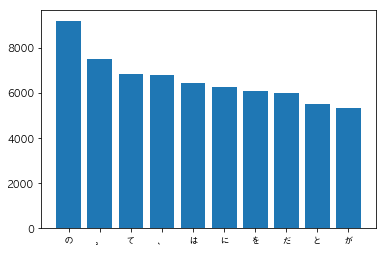

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'

top_10 = word_rank[:10]

left = np.arange(len(top_10))
height = np.array([x[1] for x in top_10])
label = [x[0] for x in top_10]

plt.bar(left, height, tick_label = label, align="center")
plt.show()

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．



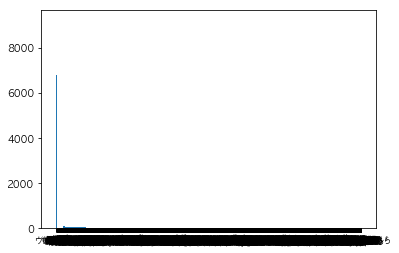

In [10]:
left = np.arange(len(word_rank))
height = np.array([x[1] for x in word_rank])
label = [x[0] for x in word_rank]

plt.bar(left, height, tick_label = label, align="center")
plt.show()

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

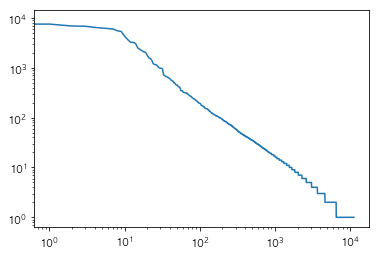

In [11]:
plt.xscale("log")
plt.yscale("log")
x = np.arange(len(word_rank))
y = np.array([x[1] for x in word_rank])

plt.plot(x,y)
plt.show()